<a href="https://colab.research.google.com/github/Vedika1102/GRIP_Task_4/blob/main/GRIP_Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Vedika Shinde

GRIP TASK 4 

#Exploratory data analysis-Terrorism

Perform 'Exploratory Data Analysis' on Dataset 'Global Terrorism'

As a security/defense analyst try to find out the hot zone of terrorism

What all security issues insights you can derive by EDA?

In [43]:
#Importing Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [44]:
import warnings
warnings.filterwarnings("ignore")

#Reading the Data

In [45]:
#import dataset
Terror = pd.read_csv("globalterrorismdb_0718dist.csv",encoding='latin1')

In [46]:
Terror.sample(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
59702,199507010023,1995,7,1,NaN,0,NaN,167,Russia,9,Eastern Europe,Sakha,Yakutsk,62.038076,129.729377,1.0,0,NaN,NaN,1,1,1,-9,NaN,NaN,0,0,0,4,Hijacking,NaN,NaN,NaN,NaN,6,Airports & Aircraft,42.0,Aircraft (not at an airport),NaN,hijacked russian airliner,167.0,Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,Russia,Russia,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-99.0,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,0.0,-9.0,NaN
37933,198904130012,1989,4,13,NaN,0,NaN,186,Sri Lanka,6,South Asia,Northern,Jaffna,9.666399,80.020477,1.0,0,NaN,NaN,1,1,0,1,1.0,Insurgency/Guerilla Action,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,4,Military,29.0,Military Unit/Patrol/Convoy,Indian Military,Indian Military Unit,92.0,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,7.0,Grenade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenade,0.0,NaN,NaN,0.0,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
22989,198408210012,1984,8,21,NaN,0,NaN,159,Peru,3,South America,Pasco,Cerro de Pasco,-10.680652,-76.259918,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,9,Unknown,NaN,NaN,NaN,NaN,1,Business,10.0,Mining,NaN,mine,159.0,Peru,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Shining Path (SL),NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Attacked,1.0,NaN,NaN,0.0,NaN,NaN,1,3.0,Minor (likely < $1 million),300000.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
55533,199403130009,1994,3,13,NaN,0,NaN,8,Angola,11,Sub-Saharan Africa,Cuanza Norte,Zenza do Itombe,-9.286693,14.213677,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,7,Government (Diplomatic),47.0,"International Organization (peacekeeper, aid a...",U.N. World Food Program,20 truck convoy,422.0,International,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,National Union for the Total Independence of A...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Firearms,2.0,Automatic or Semi-Automatic Rifle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auto

In [47]:
Terror.shape

(76473, 135)

Column Name

In [49]:
Terror.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [50]:
Terror.isna().sum() #Checking for null values

eventid                   0
iyear                     0
imonth                    0
iday                      0
approxdate            76286
extended                  0
resolution            74920
country                   0
country_txt               0
region                    0
region_txt                0
provstate               413
city                      0
latitude               3826
longitude              3827
specificity               1
vicinity                  0
location              72936
summary               66129
crit1                     0
crit2                     0
crit3                     0
doubtterr                 0
alternative           64336
alternative_txt       64336
multiple                  0
success                   0
suicide                   0
attacktype1               0
attacktype1_txt           0
attacktype2           75664
attacktype2_txt       75664
attacktype3           76433
attacktype3_txt       76433
targtype1                 0
targtype1_txt       

#Preparing the Data
Renaming the important columns

In [51]:
Terror.rename(columns={'provstate':'State','iyear':'Year','imonth':'Month','city':'City','iday':'Day','country_txt':'Country','region_txt':'Region',
                   'attacktype1_txt':'Attack_type','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary',
                   'gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

Adding a new column

In [52]:
Terror['Casualities'] = Terror.Killed + Terror.Wounded

New dataset of updated columns

In [74]:
Terror_updated = Terror[['Year','Month','Day','Country','State','Region','City','latitude','longitude','Attack_type','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive','Casualities']]

Displaying first 5 rows

In [75]:
Terror_updated.head()

,Year,Month,Day,Country,State,Region,City,latitude,longitude,Attack_type,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Casualities
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,NaN


In [76]:
Terror_updated.isna().sum() #Checking again for null values in the updated dataset

Year               0
Month              0
Day                0
Country            0
State            413
Region             0
City               0
latitude        3826
longitude       3827
Attack_type        0
Killed          6259
Wounded         8810
Target           475
Summary        66129
Group              0
Target_type        0
Weapon_type        0
Motive         66463
Casualities     9093
dtype: int64

In [77]:
Terror_updated.shape #No. of rows and columns

(76473, 19)

In [78]:
Terror_Final = Terror_updated.dropna(axis=0) #dropping all the null values

In [79]:
Terror_Final.shape

(9022, 19)

In [80]:
Terror_Final.duplicated() #Checking for duplicated values

5        False
8        False
9        False
11       False
14       False
17       False
19       False
22       False
23       False
24       False
29       False
30       False
31       False
32       False
33       False
37       False
38       False
41       False
42       False
47       False
48       False
50       False
52       False
53       False
55       False
56       False
57       False
58       False
63       False
65       False
69       False
72       False
73       False
83       False
84       False
85       False
86       False
87       False
88        True
89        True
90        True
91       False
92       False
93       False
94       False
98       False
99       False
102      False
106      False
111      False
113      False
114      False
118      False
121      False
122      False
124      False
129      False
130      False
134      False
135      False
138      False
139      False
141      False
142      False
143      False
144      False
145      F

 1.The Most Attacked countries , city , region, year, month, group, types

In [109]:
print("Country with the most attacks:",Terror_Final['Country'].value_counts().idxmax())
print("City with the most attacks:",Terror_Final['City'].value_counts().index[1]) #as few entry is 'unknown'
print("Region with the most attacks:",Terror_Final['Region'].value_counts().idxmax())
print("Year with the most attacks:",Terror_Final['Year'].value_counts().idxmax())
print("Month with the most attacks:",Terror_Final['Month'].value_counts().idxmax())
print("Group with the most attacks:",Terror_Final['Group'].value_counts().index[1])
print("Most Attack Types:",Terror_Final['Attack_type'].value_counts().idxmax())

Country with the most attacks: United States
City with the most attacks: Srinagar
Region with the most attacks: South Asia
Year with the most attacks: 2001
Month with the most attacks: 8
Group with the most attacks: Revolutionary Armed Forces of Colombia (FARC)
Most Attack Types: Bombing/Explosion


2. Country - Top 10 countries affected by terror attack

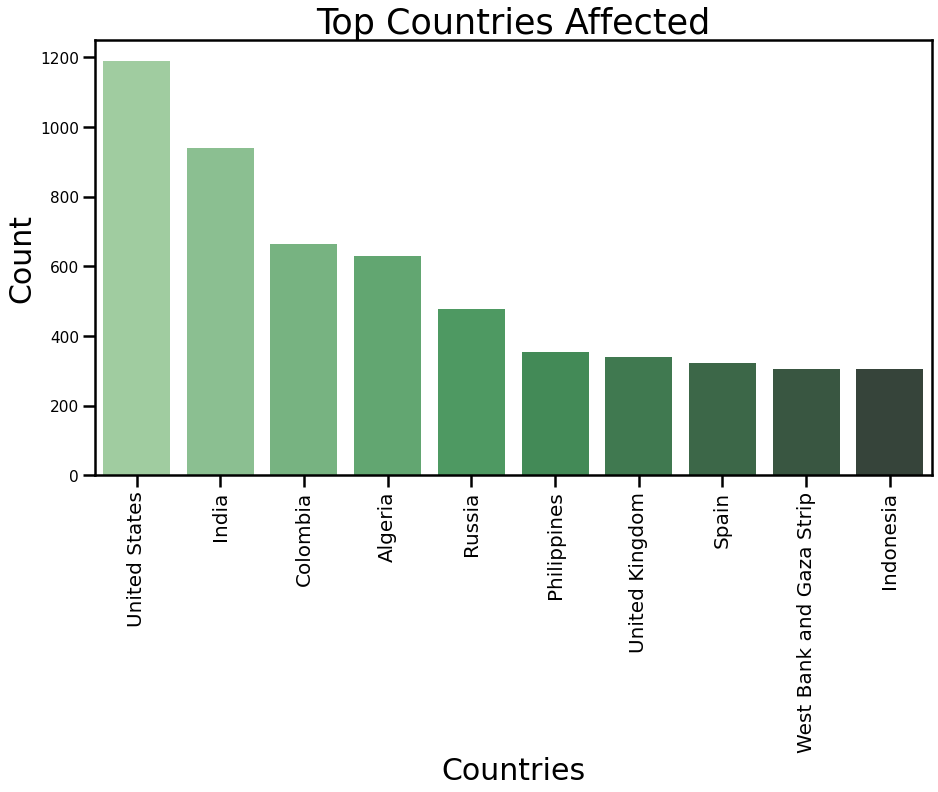

In [82]:
plt.subplots(figsize=(15,8))
sns.barplot(Terror_Final['Country'].value_counts()[:10].index,Terror_Final['Country'].value_counts()[:10].values,palette='Greens_d')
plt.title('Top Countries Affected' , fontsize = 35)
plt.xlabel('Countries' , fontsize = 30)
plt.ylabel('Count' , fontsize = 30)
plt.xticks(rotation= 90 , fontsize = 20)
plt.show()

In [83]:
idx=1
for i in Terror_Final['Country'].value_counts()[0:10].index:
    print(idx,".",i,"------>")
    print("                            ",Terror_Final['Country'].value_counts()[i],"attacks")
    print()
    idx+=1

1 . United States ------>
                             1189 attacks

2 . India ------>
                             939 attacks

3 . Colombia ------>
                             665 attacks

4 . Algeria ------>
                             628 attacks

5 . Russia ------>
                             476 attacks

6 . Philippines ------>
                             354 attacks

7 . United Kingdom ------>
                             338 attacks

8 . Spain ------>
                             322 attacks

9 . West Bank and Gaza Strip ------>
                             306 attacks

10 . Indonesia ------>
                             306 attacks



3. Year - Number of Terrorist Activities each Year

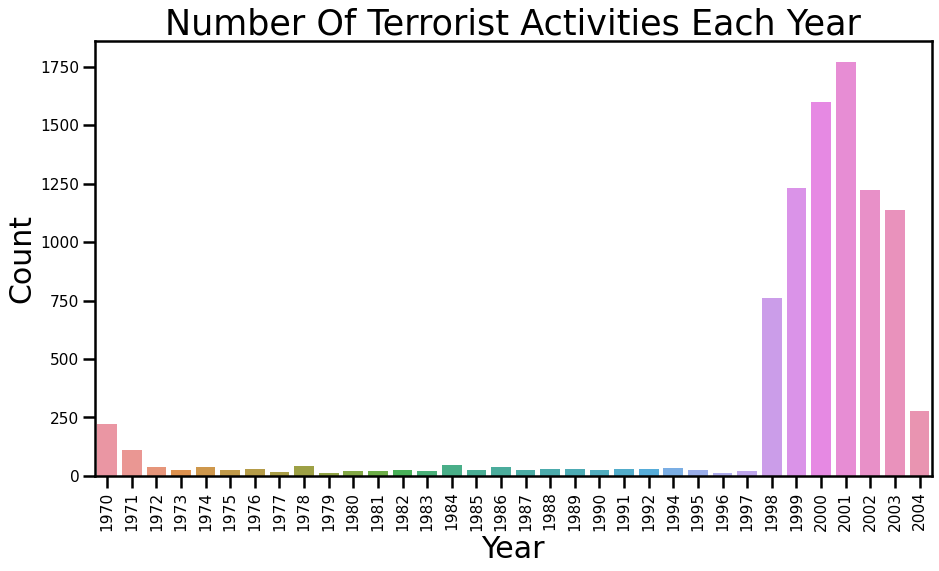

In [84]:
plt.figure(figsize=(15,8))
sns.set_context("poster" , font_scale = 0.7)
sns.countplot(Terror_Final["Year"])
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year' ,fontsize = 35 )
plt.xlabel('Year' , fontsize = 30)
plt.ylabel('Count' , fontsize = 30)
plt.show()

4. Year - Top 10 Affected Years

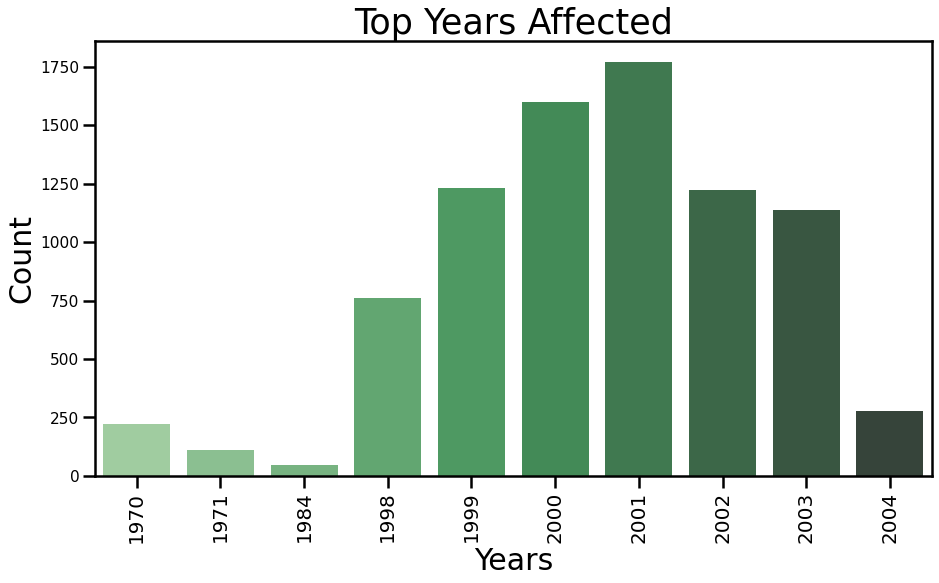

In [85]:
plt.subplots(figsize=(15,8))
sns.barplot(Terror_Final['Year'].value_counts()[:10].index,
            Terror_Final['Year'].value_counts()[:10].values,
            palette='Greens_d')
plt.title('Top Years Affected' , fontsize = 35)
plt.xlabel('Years' , fontsize = 30)
plt.ylabel('Count' , fontsize = 30)
plt.xticks(rotation= 90 , fontsize = 20)
plt.show()

5.Target_type - Counts of attacks on different types of targets

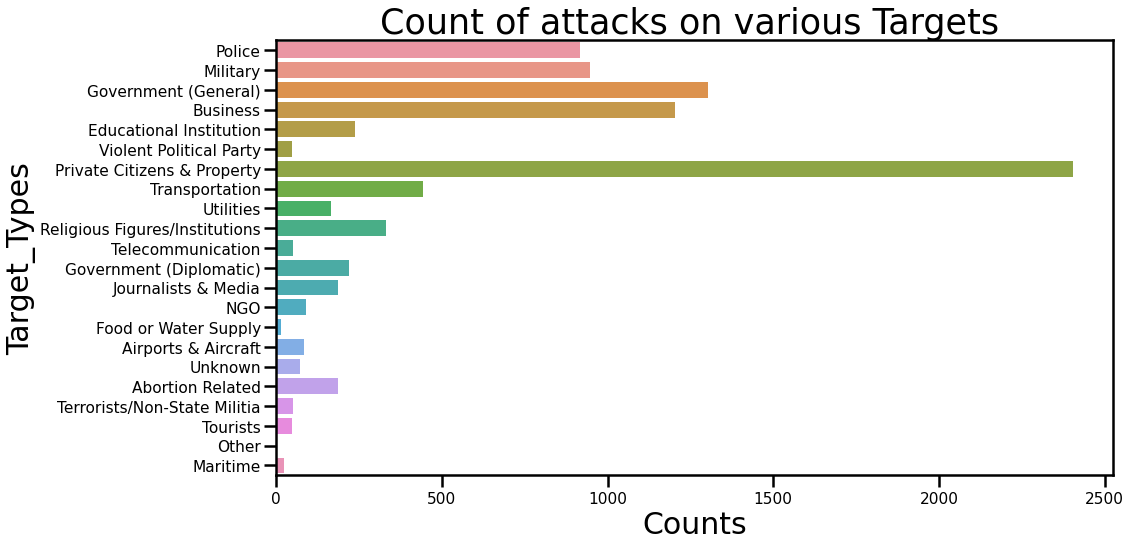

In [86]:
plt.figure(figsize=(15,8))
sns.countplot(y=Terror_Final['Target_type'])
plt.title('Count of attacks on various Targets ' , fontsize = 35)
plt.xlabel('Counts' , fontsize = 30)
plt.ylabel('Target_Types' , fontsize = 30)
plt.show()

6. Weapon Type - counts of weapons used in attacks

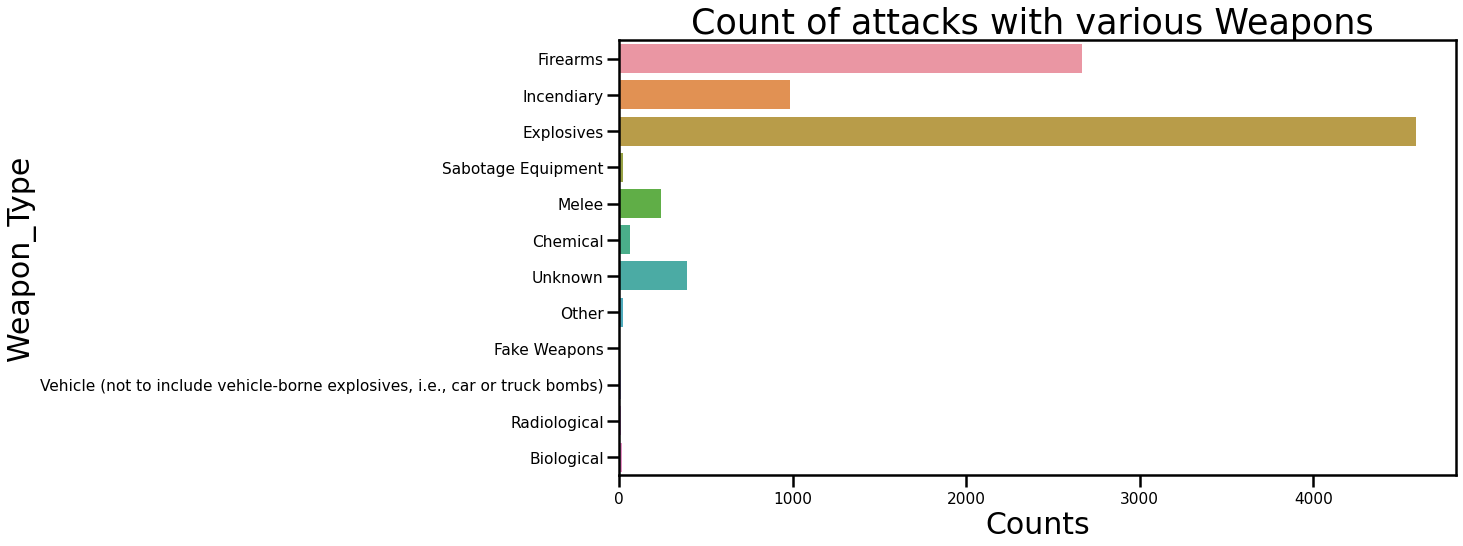

In [87]:
plt.figure(figsize=(15,8))
sns.countplot(y=Terror_Final['Weapon_type'])
plt.title('Count of attacks with various Weapons ' , fontsize = 35)
plt.xlabel('Counts' , fontsize = 30)
plt.ylabel('Weapon_Type', fontsize = 30 )
plt.show()

7.Terrorist Organisations - Top 10

In [88]:
Terror_Final['Group'].value_counts()[:10]

Unknown                                          3474
Revolutionary Armed Forces of Colombia (FARC)     307
Chechen Rebels                                    253
Liberation Tigers of Tamil Eelam (LTTE)           168
Anti-Abortion extremists                          159
Moro Islamic Liberation Front (MILF)              143
Algerian Islamic Extremists                       137
Basque Fatherland and Freedom (ETA)               131
National Liberation Army of Colombia (ELN)        126
Left-Wing Militants                               119
Name: Group, dtype: int64

8.Most affected Regions Across the Globe

In [89]:
Terror_Final["Region"].value_counts()

South Asia                     1770
Middle East & North Africa     1720
North America                  1217
Western Europe                 1103
Eastern Europe                  864
Southeast Asia                  769
South America                   758
Sub-Saharan Africa              597
Central Asia                     95
East Asia                        61
Central America & Caribbean      43
Australasia & Oceania            25
Name: Region, dtype: int64

9.Most Active Terrorist Organization

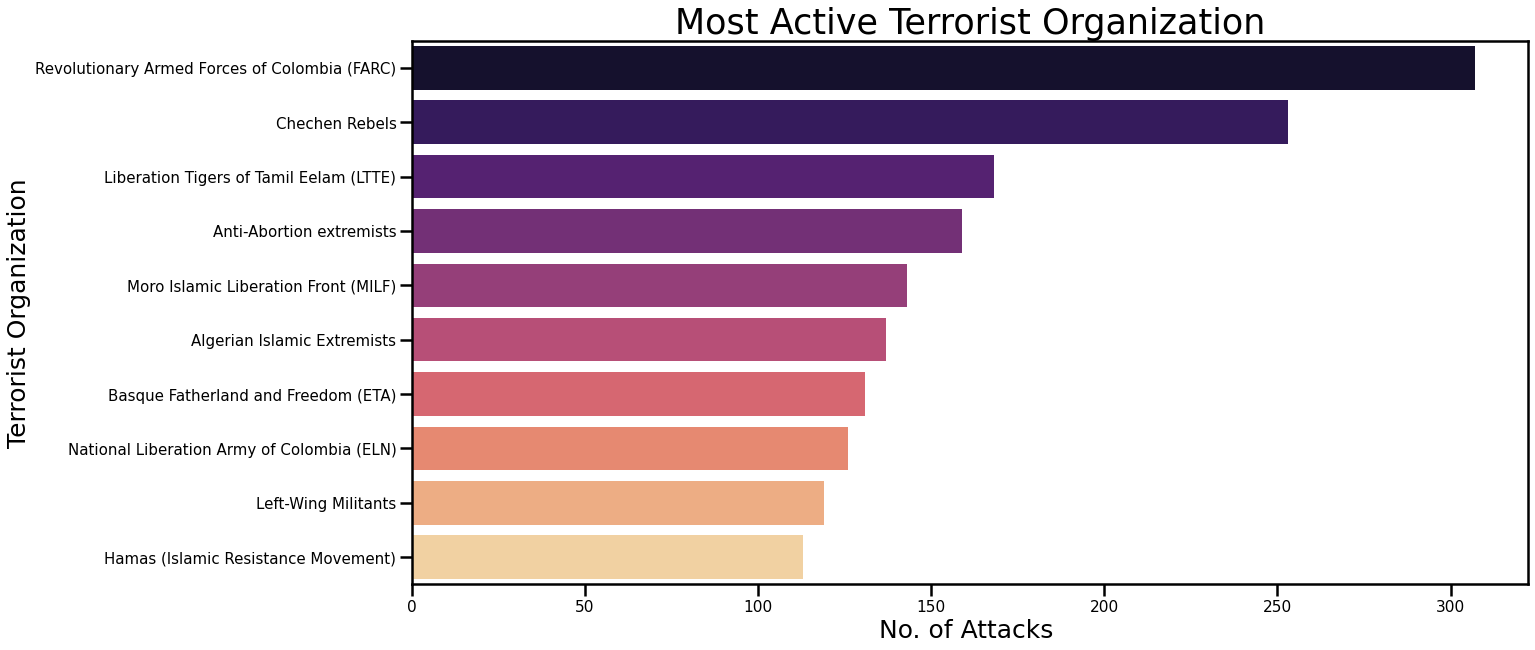

In [90]:
fig=plt.figure(figsize=(20,10))
sns.barplot(x=Terror_Final['Group'].value_counts()[1:11].values,
            y=Terror_Final['Group'].value_counts()[1:11].index,
            palette='magma')
plt.yticks(size=15)
plt.xlabel("No. of Attacks ",fontsize=25)
plt.ylabel("Terrorist Organization",fontsize=25)
plt.title("Most Active Terrorist Organization",fontsize=35)
plt.show()
fig.savefig('Most Active Terrorist Oraganization',bbox_inches='tight')

In [91]:
idx=1
print("                         Most Active Terror Organizations")
for i in Terror_Final['Group'].value_counts()[1:6].index:
    print(idx,".",i,"---->")                                                                  
    print("                                                     ",Terror_Final['Group'].value_counts()[i],"attacks")
    print()
    idx+=1

                         Most Active Terror Organizations
1 . Revolutionary Armed Forces of Colombia (FARC) ---->
                                                      307 attacks

2 . Chechen Rebels ---->
                                                      253 attacks

3 . Liberation Tigers of Tamil Eelam (LTTE) ---->
                                                      168 attacks

4 . Anti-Abortion extremists ---->
                                                      159 attacks

5 . Moro Islamic Liberation Front (MILF) ---->
                                                      143 attacks



10.Number of Casuality Due to Terror attacks

In [105]:
lis=[]
total=[]
for i in Terror_Final['Country'].value_counts().index:
    Total = Terror_Final.loc[Terror_Final['Country'] == i, 'Casualities'].sum()
    lis.append([i,Total])

In [106]:
lis=sorted(lis,key=lambda x:x[1],reverse=True)
print(*lis[:20]) 

['United States', 20039.0] ['India', 8706.0] ['Algeria', 4820.0] ['Russia', 4537.0] ['Kenya', 4294.0] ['Sri Lanka', 4182.0] ['Israel', 4123.0] ['Iraq', 4026.0] ['Colombia', 3725.0] ['Philippines', 2928.0] ['Pakistan', 2696.0] ['Spain', 2418.0] ['Indonesia', 1826.0] ['Nepal', 1539.0] ['Angola', 1494.0] ['Turkey', 1442.0] ['Uganda', 1189.0] ['Afghanistan', 1100.0] ['Bangladesh', 1083.0] ['West Bank and Gaza Strip', 1011.0]


11.Country vs Casuality

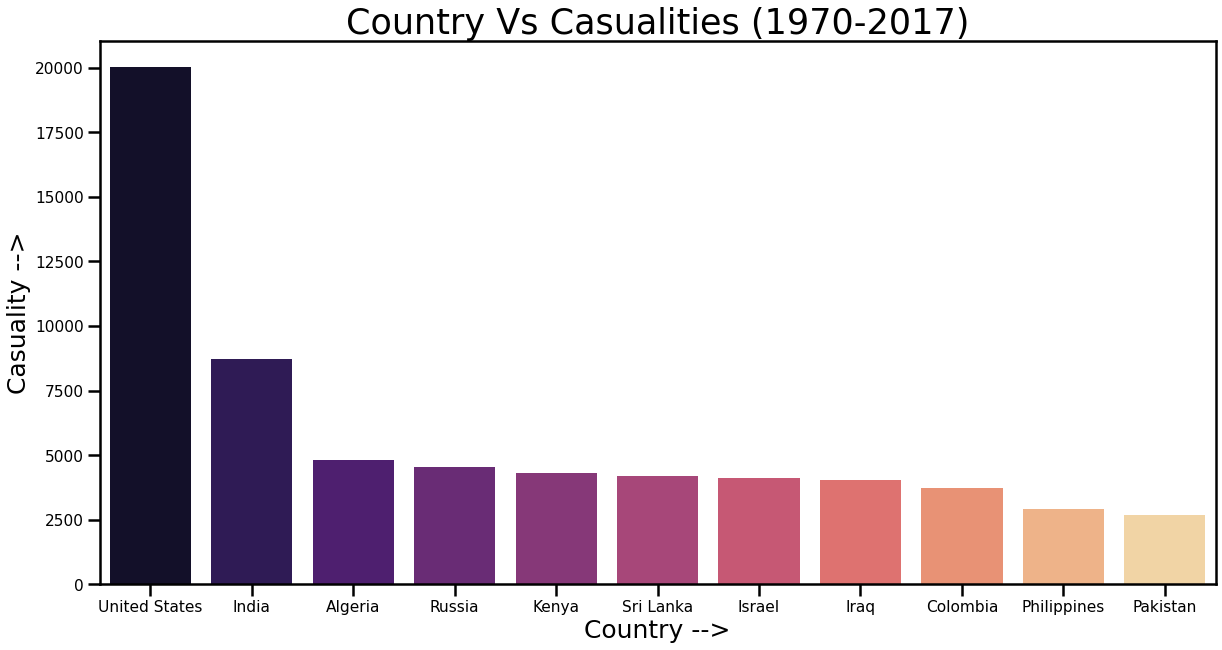

In [107]:
country=[]
casuality=[]
for i in lis[:11]:
    country.append(i[0])
    casuality.append(i[1])
#print(country)
#print(casual)
fig=plt.figure(figsize=(20,10))
plt.title("Country Vs Casualities (1970-2017)",fontsize=35)
plt.xlabel("Country -->",size=25)
plt.ylabel("Casuality -->",size=25)
sns.barplot(x=country,y=casuality,palette='magma')
plt.show()
fig.savefig('Country Vs Casuality From 1970 to 2017',bbox_inches='tight')

12.Terrorist Activities by Region in each Year through Area Plot

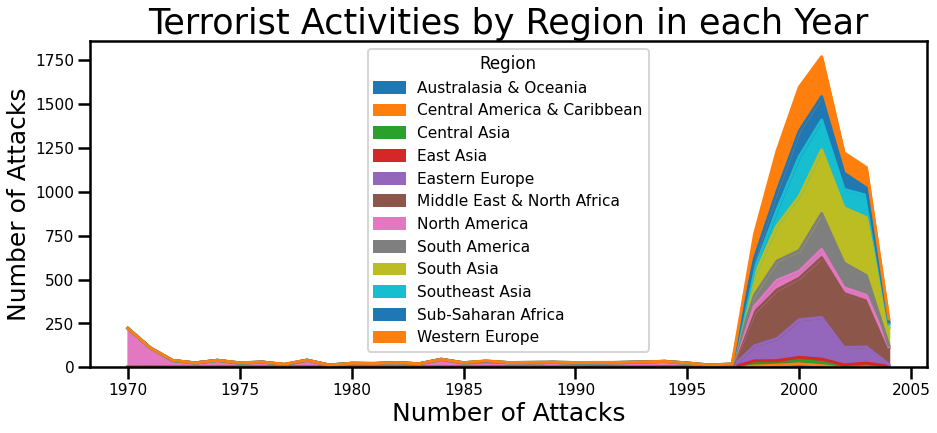

In [108]:
pd.crosstab(Terror_Final.Year, Terror_Final.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year', size = 35)
plt.xlabel('Number of Attacks' , size = 25)
plt.ylabel('Number of Attacks', size = 25)
plt.show()